In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("voice-1636985774.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
data = data[["label", "meanfreq", "median", "meanfun"]]
data.head()

,label,meanfreq,median,meanfun
0,male,0.059781,0.032027,0.084279
1,male,0.066009,0.040229,0.107937
2,male,0.077316,0.036718,0.098706
3,male,0.151228,0.158011,0.088965
4,male,0.135120,0.124656,0.106398


In [9]:
data["label"] = data["label"].map({"male":0, "female":1})

In [10]:
x_meanfreq = data["meanfreq"].values.reshape(-1,1)
x_median = data["median"].values.reshape(-1,1)
x_meanfun = data["meanfun"].values.reshape(-1,1)
y = data["label"].values

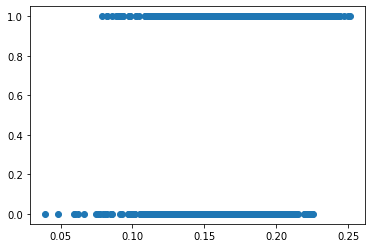

In [14]:
plt.scatter(x_meanfreq, y)
plt.show()

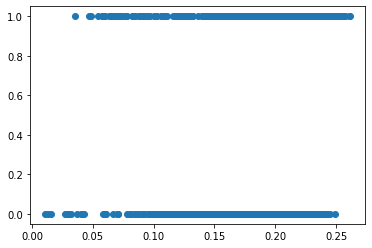

In [15]:
plt.scatter(x_median, y)
plt.show()

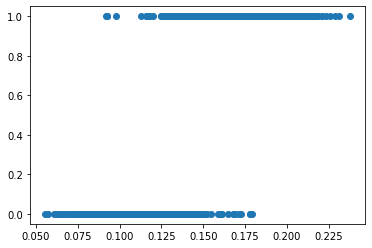

In [16]:
plt.scatter(x_meanfun, y)
plt.show()

In [17]:
model_meanfun = LogisticRegression().fit(x_meanfun, y)

In [20]:
y_predict = model_meanfun.predict_proba(x_meanfun)
y_predict_1 = [[i[1]] for i in y_predict]

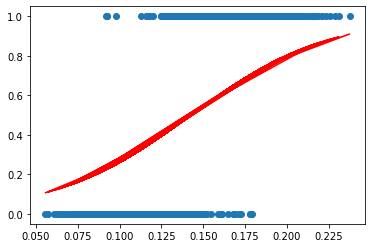

In [22]:
plt.scatter(x_meanfun, y)
plt.plot(x_meanfun, y_predict_1, c = "r")

# mit x Werten

In [27]:
x_num = [[i] for i in np.linspace(0.03, 0.25, 1000)]
y_predict_2 = model_meanfun.predict_proba(x_num)
y_predict_2 = [i[1] for i in y_predict_2]

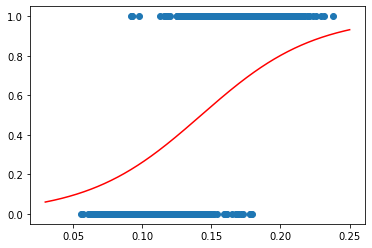

In [28]:
plt.scatter(x_meanfun, y)
plt.plot(x_num, y_predict_2, c = "r")

# Mit Testdaten aus dem Dataframe

In [33]:
train, test = train_test_split(data, test_size = 0.2)

In [36]:
x_meanfun_train = train["meanfun"].values.reshape(-1,1)
x_meanfun_test = test["meanfun"].values.reshape(-1,1)

y_train = train["label"].values
y_test = test["label"].values


In [45]:
model_meanfun_train = LogisticRegression().fit(x_meanfun_train, y_train)

In [46]:
r2_meanfun = model_meanfun_train.score(x_meanfun_test, y_test)
r2_meanfun

0.9526813880126183

In [52]:
y_predict_3 = model_meanfun_train.predict_proba(x_meanfun)
y_predict_31 = [i[1] for i in y_predict_3]

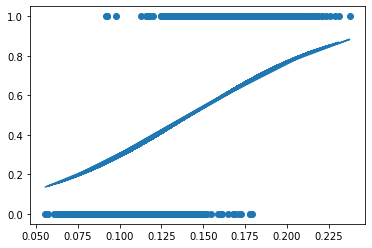

In [53]:
plt.scatter(x_meanfun, y)
plt.plot(x_meanfun, y_predict_31)